## Assignment - Car prices

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

In [4]:
# Importing data
carprices = pd.read_csv("C:/Users/wycliffe pepela/Desktop/projo/future/Untitled Folder 1/Car-Price-Prediction/CarPrice_Data.csv")

#check the dataframe
carprices.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Now, let us have a look at the various aspects of the dataset

In [5]:
carprices.shape

(205, 26)

In [6]:
carprices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

That is there are no missing values in the dataset.

In [7]:
carprices.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
# remove any duplicates
carprices.drop_duplicates()

carprices.shape

(205, 26)

In [9]:
# drop the car_ID column as it is of no use to the analyses 
carprices.drop(['car_ID'], axis = 1, inplace = True)

carprices.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
# counting the unique values to find out if there is any constant column
carprices.nunique()

symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

### Visualising the data

Our next step will be to see if there are any patterns between the different variables(depenent and/or independent)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

Looking at the numerical Variables first, 

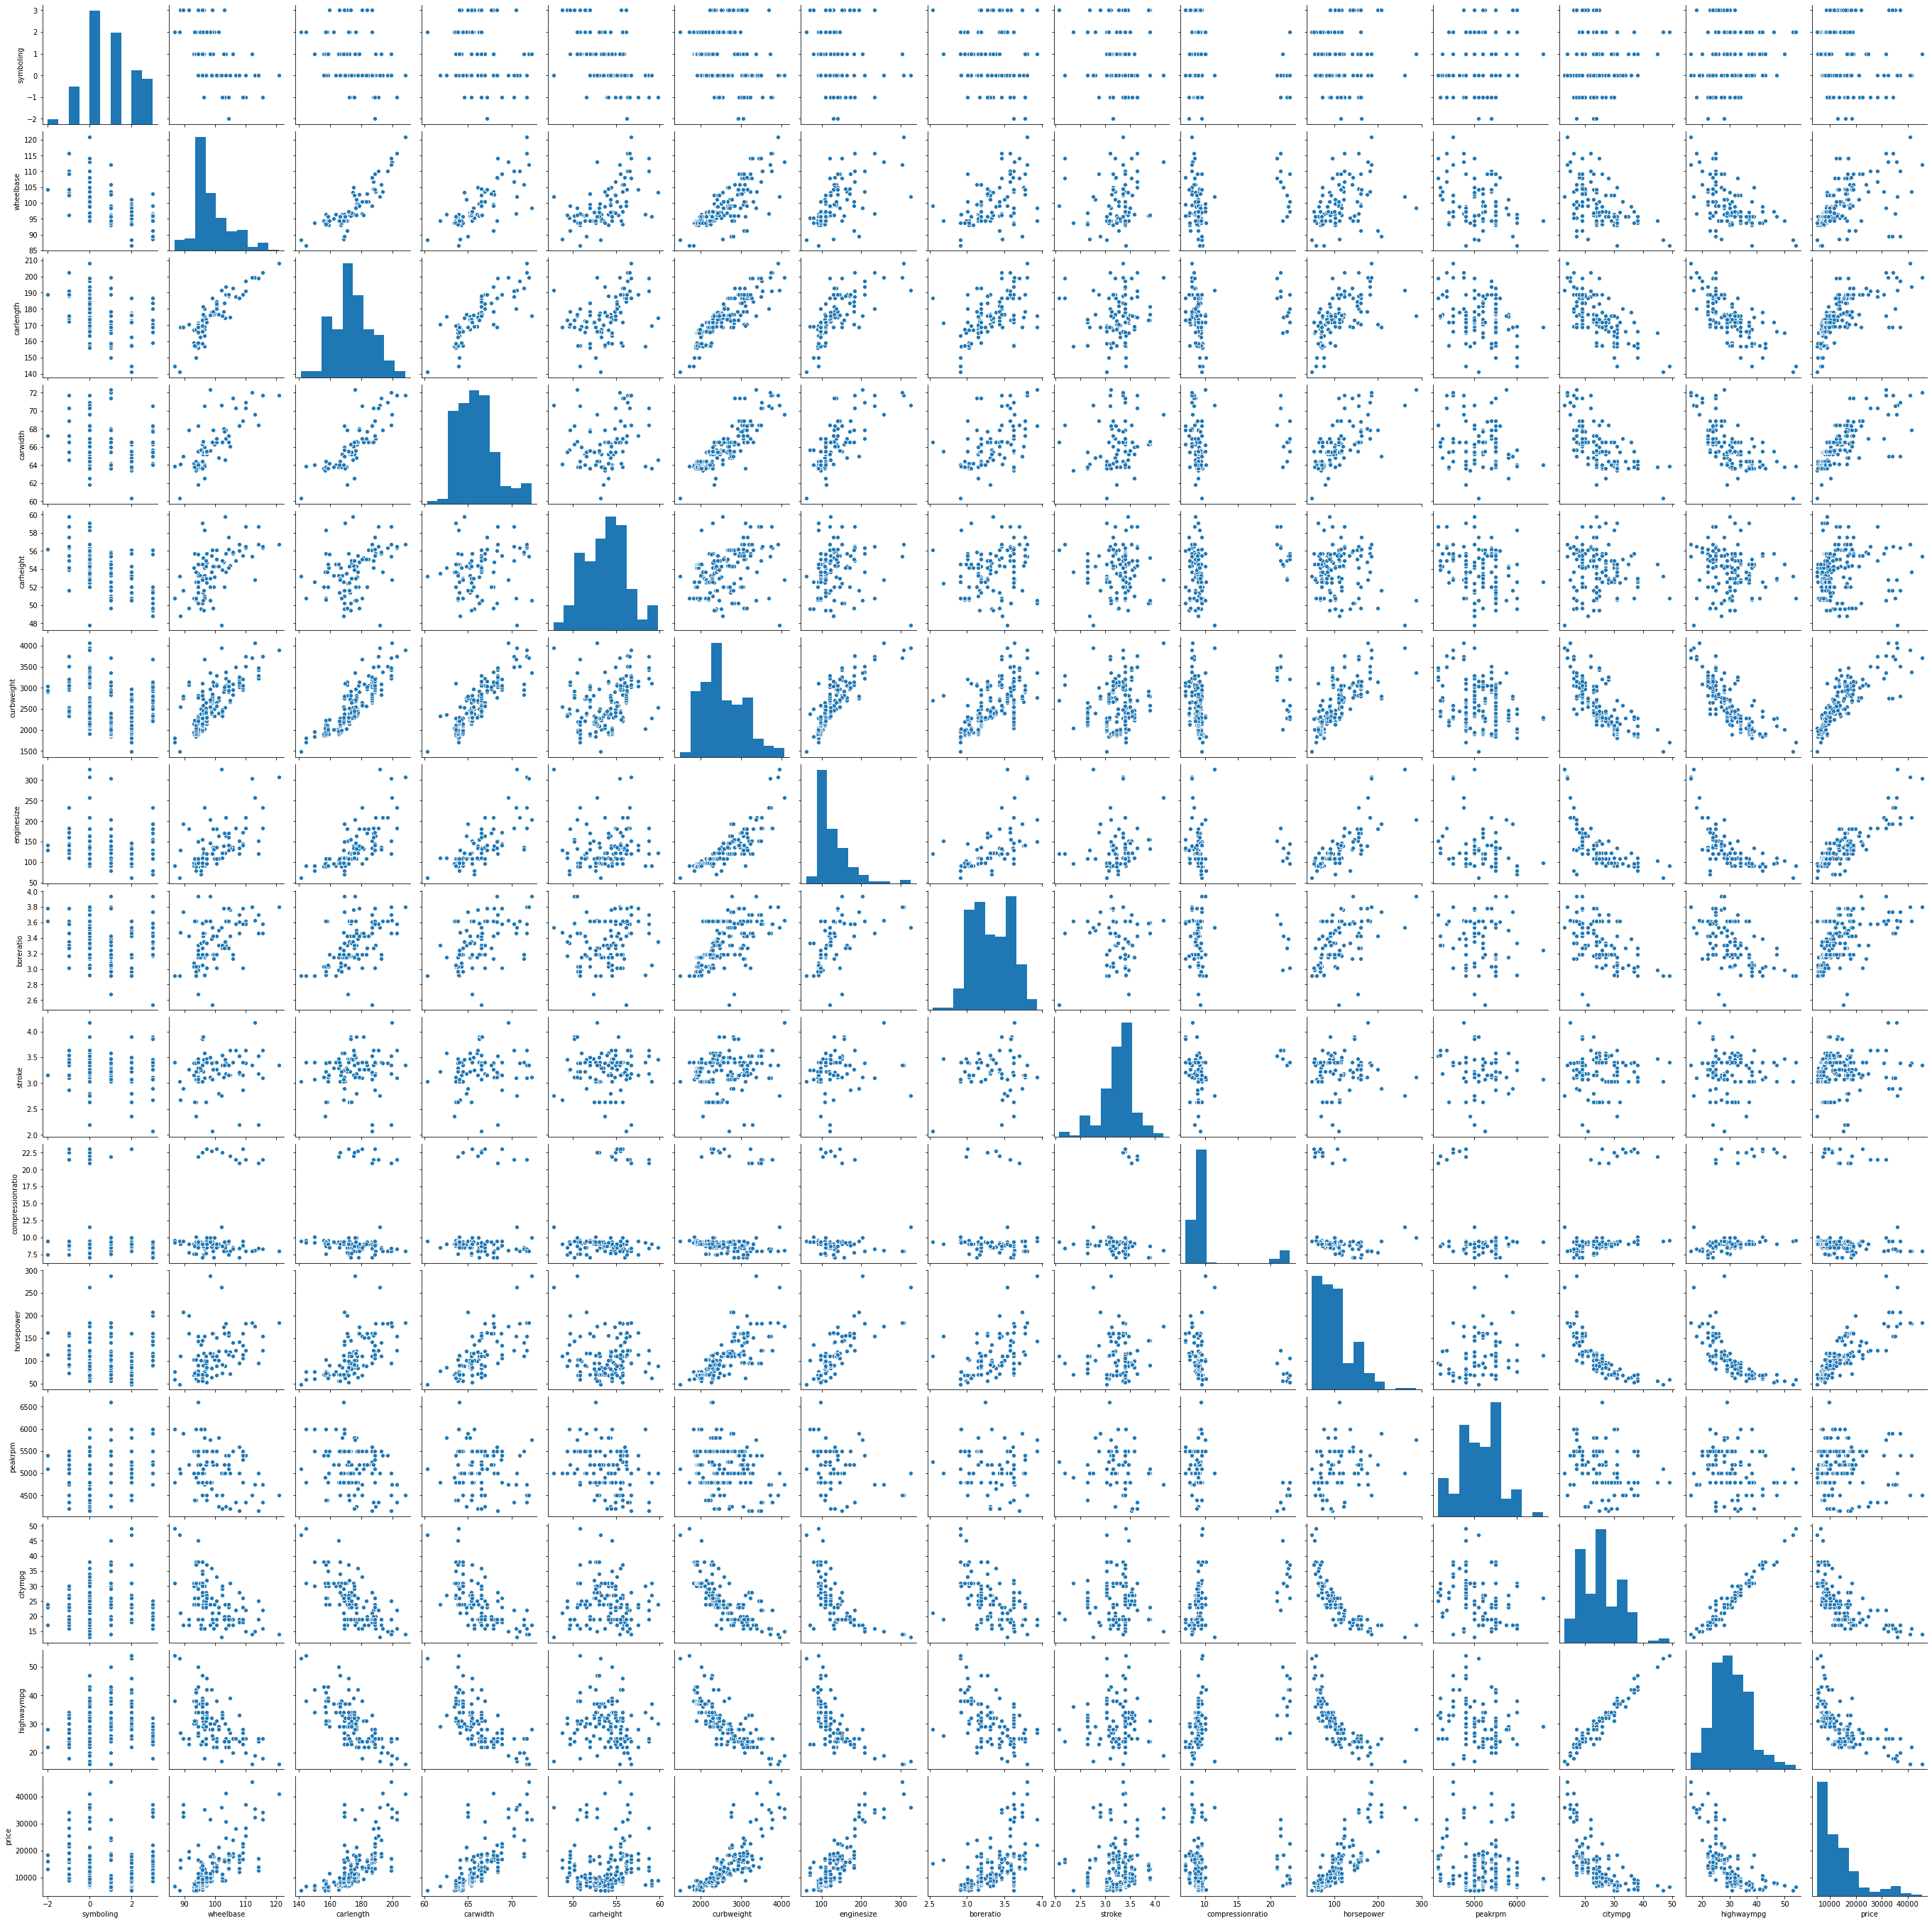

In [12]:
sns.pairplot(carprices)
plt.show()

It is very clear from the above plot that other than a nuber of variables like `curbweight`, `enginesize`, `carlength`, `hoursepower`, etc. showing a strong relationship with the dependent variable, there are some independent variables which are clearly showing multicollinearity like `citympg`&`highwaympg`, `wheelbase`&`carlength`, `carlength`&`carwidth`, `curbweight`&`carlength`, etc.

Moving on to the categorical valiables, 

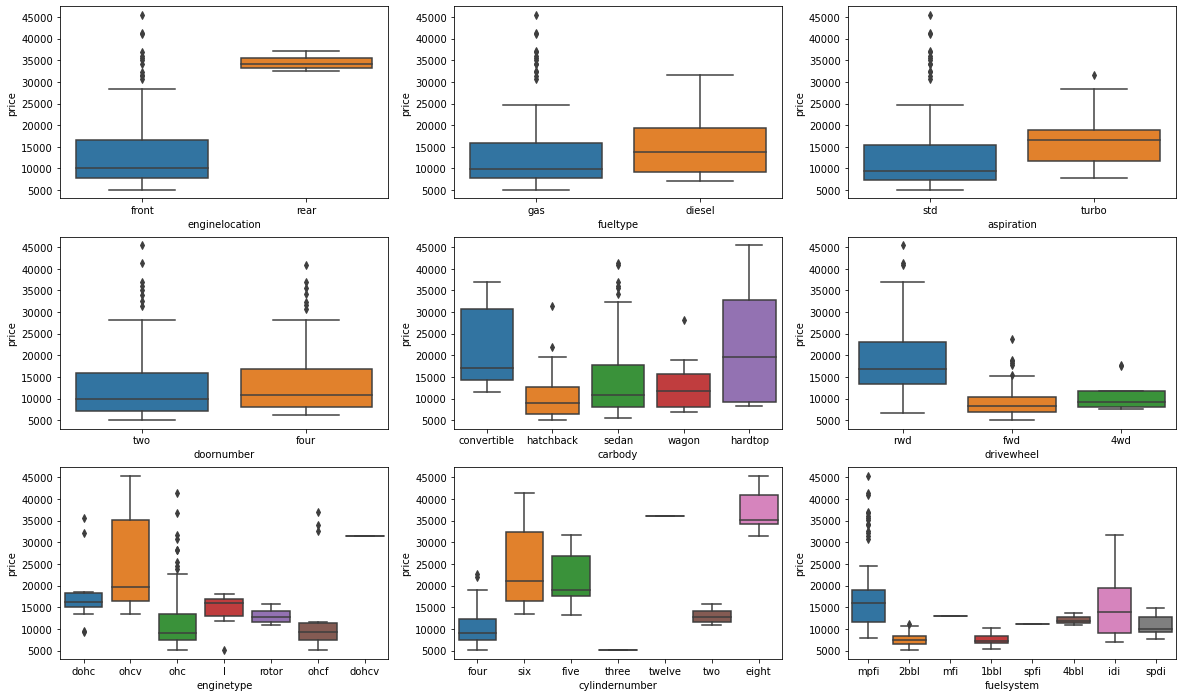

In [13]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'enginelocation', y = 'price', data = carprices)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = carprices)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = carprices)
plt.subplot(3,3,4)
sns.boxplot(x = 'doornumber', y = 'price', data = carprices)
plt.subplot(3,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = carprices)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = carprices)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = carprices)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = carprices)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = carprices)
plt.show()

Also let's see the relationships between some of these categorical variables,

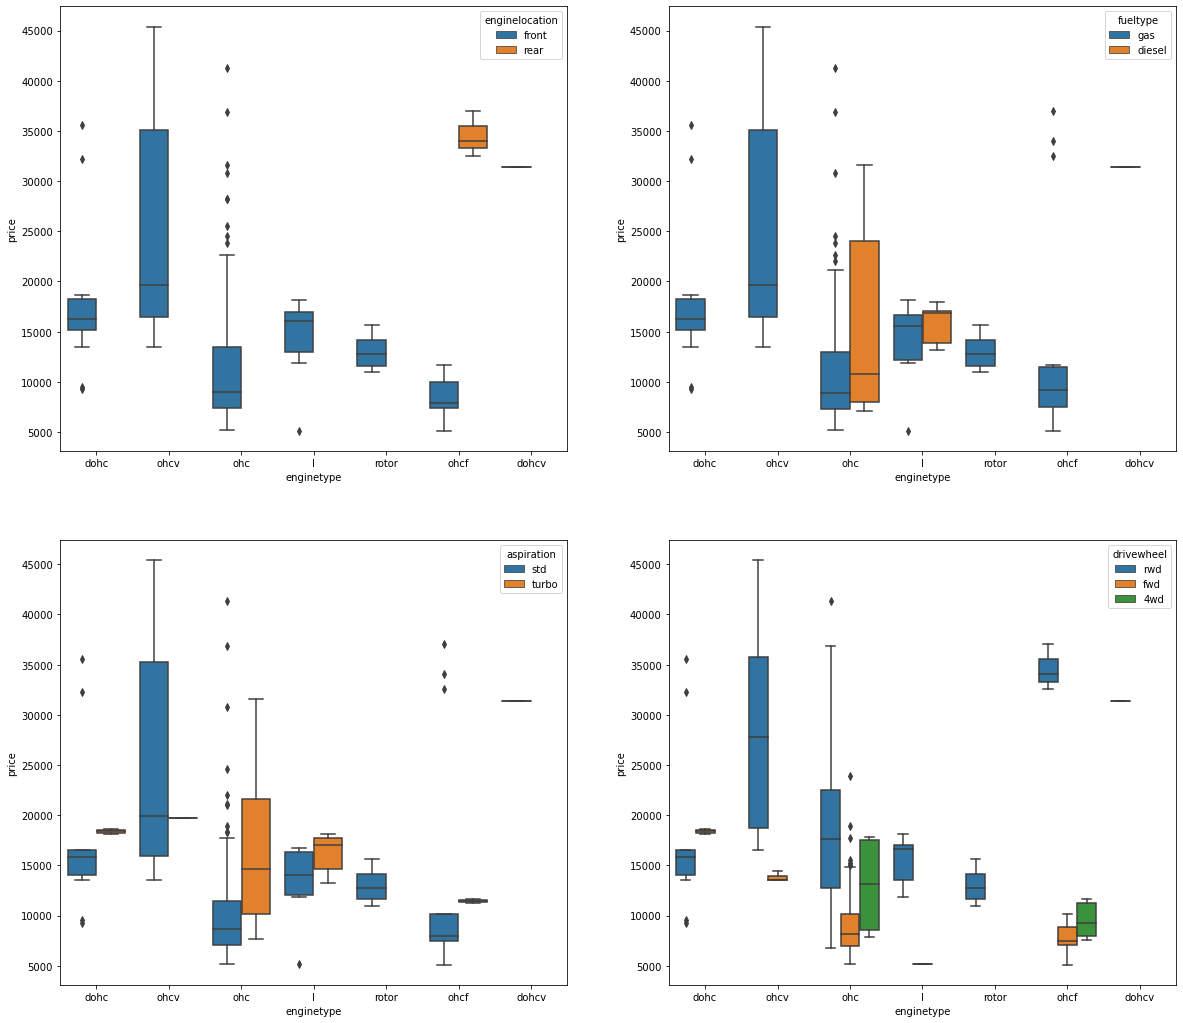

In [14]:
plt.figure(figsize = (20, 18))
plt.subplot(2,2,1)
sns.boxplot(x = 'enginetype', y = 'price', hue = 'enginelocation', data = carprices)
plt.subplot(2,2,2)
sns.boxplot(x = 'enginetype', y = 'price', hue = 'fueltype', data = carprices)
plt.subplot(2,2,3)
sns.boxplot(x = 'enginetype', y = 'price', hue = 'aspiration', data = carprices)
plt.subplot(2,2,4)
sns.boxplot(x = 'enginetype', y = 'price', hue = 'drivewheel', data = carprices)
plt.show()

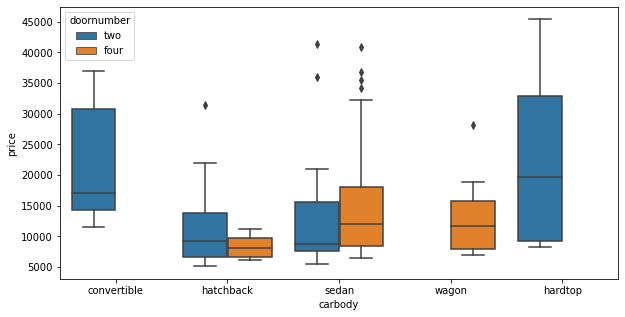

In [15]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'carbody', y = 'price', hue = 'doornumber', data = carprices)
plt.show()

So we can derive a numorous observations from the above boxplots.

### Data preparation

Now while preparing the dataset for the modelling, we first need to convert the string type categorical variables to numerical ones.

Starting with the column `CarName` to be converted to `carCompany` by deriving first string from the original value.

In [16]:
carprices['carCompany'] = carprices['CarName'].str.split(" ", n=1, expand=True)[0]

carprices.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carCompany
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [17]:
# dropping the column CarName as it is not required anymore
carprices.drop(['CarName'], axis = 1, inplace = True)

carprices.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carCompany
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


Next let's convert the categorical columns with only two unique values i.e., `enginelocation`, `aspiration`, `fueltype` & `doornumber`.

In [18]:
# converting column enginelocation to rearengine with 1 for rear and 0 for front
carprices['enginelocation'] = carprices['enginelocation'].str.lower().map({'front': 0, 'rear': 1})
# rename the column 
carprices.rename(columns={'enginelocation': 'rearengine'}, inplace=True)

carprices.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,rearengine,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carCompany
0,3,gas,std,two,convertible,rwd,0,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,0,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,0,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,0,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,0,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [19]:
# converting column aspiration to turboengine with 1 for turbo and 0 for std
carprices['aspiration'] = carprices['aspiration'].str.lower().map({'std': 0, 'turbo': 1})
# rename the column 
carprices.rename(columns={'aspiration': 'turboengine'}, inplace=True)

carprices.head()

,symboling,fueltype,turboengine,doornumber,carbody,drivewheel,rearengine,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carCompany
0,3,gas,0,two,convertible,rwd,0,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,0,two,convertible,rwd,0,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,0,two,hatchback,rwd,0,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,0,four,sedan,fwd,0,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,0,four,sedan,4wd,0,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [20]:
# converting column fueltype to gasfuel with 1 for gas and 0 for diesel
carprices['fueltype'] = carprices['fueltype'].str.lower().map({'diesel': 0, 'gas': 1})
# rename the column 
carprices.rename(columns={'fueltype': 'gasfuel'}, inplace=True)

carprices.head()

,symboling,gasfuel,turboengine,doornumber,carbody,drivewheel,rearengine,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carCompany
0,3,1,0,two,convertible,rwd,0,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,1,0,two,convertible,rwd,0,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,1,0,two,hatchback,rwd,0,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,1,0,four,sedan,fwd,0,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,1,0,four,sedan,4wd,0,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [21]:
# converting column doornumber to doubledoor with 1 for two and 0 for four doors
carprices['doornumber'] = carprices['doornumber'].str.lower().map({'four': 0, 'two': 1})
# rename the column 
carprices.rename(columns={'doornumber': 'doubledoor'}, inplace=True)

carprices.head()

,symboling,gasfuel,turboengine,doubledoor,carbody,drivewheel,rearengine,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carCompany
0,3,1,0,1,convertible,rwd,0,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,1,0,1,convertible,rwd,0,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,1,0,1,hatchback,rwd,0,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,1,0,0,sedan,fwd,0,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,1,0,0,sedan,4wd,0,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


<br/>

Also, converting `cylindernumber` to the numeric values as it will be a better idea as count of cylinder can possibly affect the price.

In [22]:
# converting values of column cylindernumber from string to number
carprices['cylindernumber'] = carprices['cylindernumber'].str.lower().map({'four': 4, 'six': 6, 'five': 5, 'three': 3, 'twelve': 12, 'two': 2, 'eight': 8})

carprices.head()

,symboling,gasfuel,turboengine,doubledoor,carbody,drivewheel,rearengine,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carCompany
0,3,1,0,1,convertible,rwd,0,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,1,0,1,convertible,rwd,0,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,1,0,1,hatchback,rwd,0,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,1,0,0,sedan,fwd,0,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,1,0,0,sedan,4wd,0,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


And leaving another categorical variable `symboling` as it is in the numeric form as it signifies the risk rating of a car therefore should natually affect the prices.

#### Dummy variables

We have several categorical variables with more than two levels, let's move on to converting them into integer values using dummy variables.

Starting with the `carCompany`, let's check for the unique values, 

In [23]:
# list unique values in carCompany
carprices['carCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

in the above list of 28 values we have some redundancies, 

* Nissan & nissan
* porsche & porcshce
* toyota & toyouta
* vokswagen, volkswagen & vw

let's remove them first, 

In [24]:
# append the values in the column to match their similar ones
carprices.loc[carprices['carCompany'] == 'Nissan', ['carCompany']] = 'nissan'
carprices.loc[carprices['carCompany'] == 'porcshce', ['carCompany']] = 'porsche'
carprices.loc[carprices['carCompany'] == 'toyouta', ['carCompany']] = 'toyota'
carprices.loc[(carprices['carCompany'] == 'vokswagen') | (carprices['carCompany'] == 'vw'), ['carCompany']] = 'volkswagen'

# check the unique values again
carprices['carCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'],
      dtype=object)

now that we have the distinct set of 23 levels, let's convert the column into `dummyvariables`

In [25]:
# get dummies into company dataframe
company = pd.get_dummies(carprices['carCompany'], drop_first = True)

# add the results to the original dataframe
carprices = pd.concat([carprices, company], axis = 1)

carprices.head()

,symboling,gasfuel,turboengine,doubledoor,carbody,drivewheel,rearengine,wheelbase,carlength,carwidth,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,1,0,1,convertible,rwd,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
1,3,1,0,1,convertible,rwd,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,hatchback,rwd,0,94.5,171.2,65.5,...,0,0,0,0,0,0,0,0,0,0
3,2,1,0,0,sedan,fwd,0,99.8,176.6,66.2,...,0,0,0,0,0,0,0,0,0,0
4,2,1,0,0,sedan,4wd,0,99.4,176.6,66.4,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# drop the original column carCompany 
carprices.drop(['carCompany'], axis = 1, inplace = True)

carprices.head()

,symboling,gasfuel,turboengine,doubledoor,carbody,drivewheel,rearengine,wheelbase,carlength,carwidth,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,1,0,1,convertible,rwd,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
1,3,1,0,1,convertible,rwd,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,hatchback,rwd,0,94.5,171.2,65.5,...,0,0,0,0,0,0,0,0,0,0
3,2,1,0,0,sedan,fwd,0,99.8,176.6,66.2,...,0,0,0,0,0,0,0,0,0,0
4,2,1,0,0,sedan,4wd,0,99.4,176.6,66.4,...,0,0,0,0,0,0,0,0,0,0


Next up are the columns, 

* `carbody` with 5 levels
* `drivewheel` with 3 levels
* `enginetype` with 7 levels
* `fuelsystem` with 8 levels

let's get dummies for them one by one.

In [27]:
# get dummies for carbody into bodytype dataframe
bodytype = pd.get_dummies(carprices['carbody'], drop_first = True)

# add the results to the original dataframe
carprices = pd.concat([carprices, bodytype], axis = 1)

# drop the original column carCompany 
carprices.drop(['carbody'], axis = 1, inplace = True)

carprices.head()

,symboling,gasfuel,turboengine,doubledoor,drivewheel,rearengine,wheelbase,carlength,carwidth,carheight,...,renault,saab,subaru,toyota,volkswagen,volvo,hardtop,hatchback,sedan,wagon
0,3,1,0,1,rwd,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
1,3,1,0,1,rwd,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,rwd,0,94.5,171.2,65.5,52.4,...,0,0,0,0,0,0,0,1,0,0
3,2,1,0,0,fwd,0,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,0,0,1,0
4,2,1,0,0,4wd,0,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,0,0,1,0


In [28]:
# get dummies for drivewheel into wheel dataframe
wheel = pd.get_dummies(carprices['drivewheel'], drop_first = True)

# add the results to the original dataframe
carprices = pd.concat([carprices, wheel], axis = 1)

# drop the original column carCompany 
carprices.drop(['drivewheel'], axis = 1, inplace = True)

carprices.head()

,symboling,gasfuel,turboengine,doubledoor,rearengine,wheelbase,carlength,carwidth,carheight,curbweight,...,subaru,toyota,volkswagen,volvo,hardtop,hatchback,sedan,wagon,fwd,rwd
0,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,1
1,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,1
2,1,1,0,1,0,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,1,0,0,0,1
3,2,1,0,0,0,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,1,0,1,0
4,2,1,0,0,0,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,1,0,0,0


In [29]:
# get dummies for enginetype into engine dataframe
engine = pd.get_dummies(carprices['enginetype'], drop_first = True)

# add the results to the original dataframe
carprices = pd.concat([carprices, engine], axis = 1)

# drop the original column carCompany 
carprices.drop(['enginetype'], axis = 1, inplace = True)

carprices.head()

,symboling,gasfuel,turboengine,doubledoor,rearengine,wheelbase,carlength,carwidth,carheight,curbweight,...,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor
0,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,1,0,0,0,0,0,0
1,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,1,0,0,0,0,0,0
2,1,1,0,1,0,94.5,171.2,65.5,52.4,2823,...,0,0,0,1,0,0,0,0,1,0
3,2,1,0,0,0,99.8,176.6,66.2,54.3,2337,...,1,0,1,0,0,0,1,0,0,0
4,2,1,0,0,0,99.4,176.6,66.4,54.3,2824,...,1,0,0,0,0,0,1,0,0,0


In [30]:
# get dummies for fuelsystem into fsystem dataframe
fsystem = pd.get_dummies(carprices['fuelsystem'], drop_first = True)

# add the results to the original dataframe
carprices = pd.concat([carprices, fsystem], axis = 1)

# drop the original column carCompany 
carprices.drop(['fuelsystem'], axis = 1, inplace = True)

carprices.head()

,symboling,gasfuel,turboengine,doubledoor,rearengine,wheelbase,carlength,carwidth,carheight,curbweight,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
1,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,1,1,0,1,0,94.5,171.2,65.5,52.4,2823,...,0,1,0,0,0,0,0,1,0,0
3,2,1,0,0,0,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,1,0,0
4,2,1,0,0,0,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,1,0,0


which concludes this part of `Data preparation`, to be double sure let's take a look at the info, 

In [31]:
carprices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 61 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   gasfuel           205 non-null    int64  
 2   turboengine       205 non-null    int64  
 3   doubledoor        205 non-null    int64  
 4   rearengine        205 non-null    int64  
 5   wheelbase         205 non-null    float64
 6   carlength         205 non-null    float64
 7   carwidth          205 non-null    float64
 8   carheight         205 non-null    float64
 9   curbweight        205 non-null    int64  
 10  cylindernumber    205 non-null    int64  
 11  enginesize        205 non-null    int64  
 12  boreratio         205 non-null    float64
 13  stroke            205 non-null    float64
 14  compressionratio  205 non-null    float64
 15  horsepower        205 non-null    int64  
 16  peakrpm           205 non-null    int64  
 1

Finally, all our variables are now numeric.

### Train-Test splitting of the data

Starting the regression with the basic step of splitting the data into train-test sets,

In [32]:
from sklearn.model_selection import train_test_split

# specifying this to maintain the same rows for the train and test data set always, respectively
np.random.seed(0)
carprices_train, carprices_test = train_test_split(carprices, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Rescaling the features

Before modelling, one very critical step to optimising the performance is by keeping all the features in a common scale. We will use MinMax scaling for the same.

In [33]:
# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# creating an object for scaling
scaler = MinMaxScaler()

In [34]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
nvars = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight','curbweight', 'cylindernumber', 'cylindernumber', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

carprices_train[nvars] = scaler.fit_transform(carprices_train[nvars])

carprices_train.head()

,symboling,gasfuel,turboengine,doubledoor,rearengine,wheelbase,carlength,carwidth,carheight,curbweight,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
122,0.6,1,0,0,0,0.244828,0.426016,0.291667,0.265487,0.272692,...,0,0,0,1,0,0,0,0,0,0
125,1.0,1,0,1,0,0.272414,0.452033,0.666667,0.212389,0.500388,...,0,0,0,0,0,0,0,1,0,0
166,0.6,1,0,1,0,0.272414,0.448780,0.308333,0.424779,0.314973,...,0,0,0,0,0,0,0,1,0,0
1,1.0,1,0,1,0,0.068966,0.450407,0.316667,0.088496,0.411171,...,0,0,0,0,0,0,0,1,0,0
199,0.2,1,1,0,0,0.610345,0.775610,0.575000,0.858407,0.647401,...,0,0,0,0,0,0,0,1,0,0


In [35]:
carprices_train.describe()

,symboling,gasfuel,turboengine,doubledoor,rearengine,wheelbase,carlength,carwidth,carheight,curbweight,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.559441,0.909091,0.181818,0.440559,0.006993,0.411141,0.525476,0.461655,0.509004,0.407878,...,0.083916,0.062937,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,0.239200,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,...,0.278236,0.243703,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.400000,1.000000,0.000000,0.000000,0.000000,0.272414,0.399187,0.304167,0.353982,0.245539,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,0.600000,1.000000,0.000000,0.000000,0.000000,0.341379,0.502439,0.425000,0.522124,0.355702,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,0.600000,1.000000,0.000000,1.000000,0.000000,0.503448,0.669919,0.550000,0.668142,0.559542,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


This is clearly visible that there are a few columns in the carprices_train which have single unique value left (like `mfi`and `spfi`), let's remove these columns as these are of no use anymore.

In [36]:
# find the variables with single unique value
var = pd.DataFrame()
var = carprices_train.nunique()

# drop these columns from the dataframe
carprices_train.drop(var[var == 1].index, axis=1, inplace=True)

carprices_train.describe()

,symboling,gasfuel,turboengine,doubledoor,rearengine,wheelbase,carlength,carwidth,carheight,curbweight,...,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mpfi,spdi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.559441,0.909091,0.181818,0.440559,0.006993,0.411141,0.525476,0.461655,0.509004,0.407878,...,0.062937,0.685315,0.083916,0.062937,0.027972,0.349650,0.020979,0.090909,0.440559,0.041958
std,0.239200,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,...,0.243703,0.466023,0.278236,0.243703,0.165472,0.478536,0.143818,0.288490,0.498199,0.201198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,1.000000,0.000000,0.000000,0.000000,0.272414,0.399187,0.304167,0.353982,0.245539,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,1.000000,0.000000,0.000000,0.000000,0.341379,0.502439,0.425000,0.522124,0.355702,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.600000,1.000000,0.000000,1.000000,0.000000,0.503448,0.669919,0.550000,0.668142,0.559542,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Correlation check

Let's verify the correlation between the different variables using heatmap.

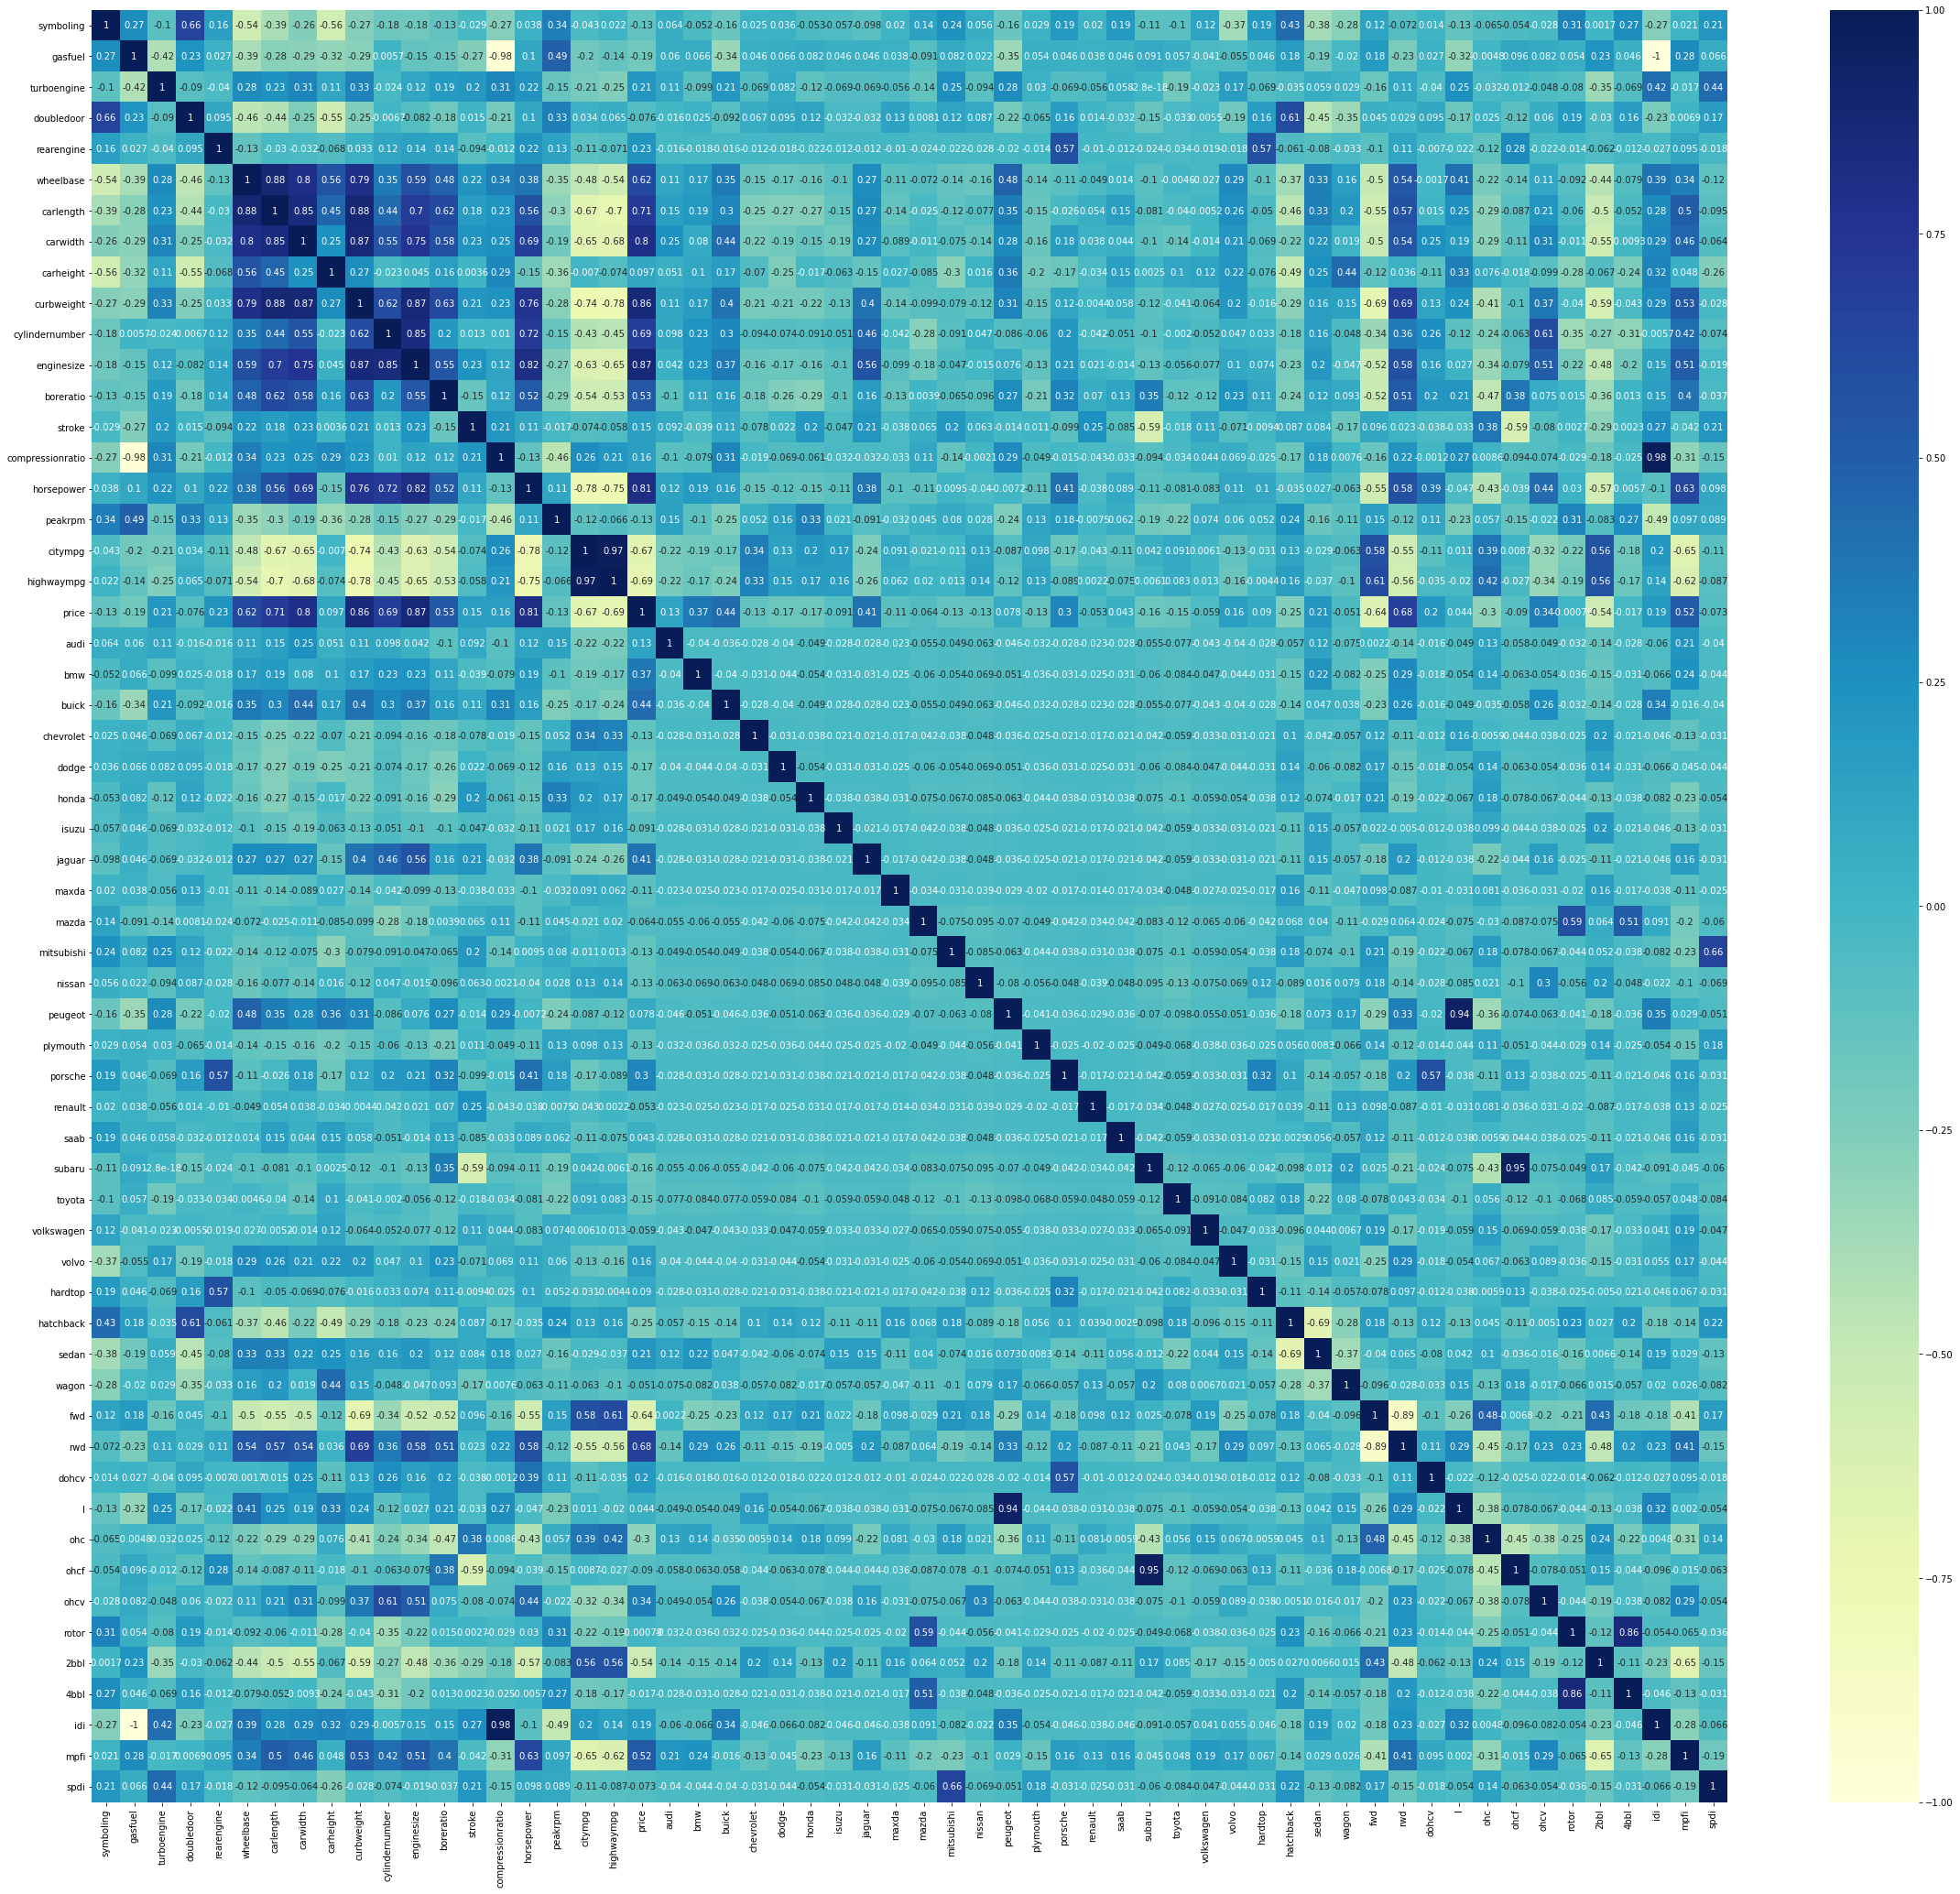

In [37]:
plt.figure(figsize = (40, 36))
sns.heatmap(carprices_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As we can see, `enginesize`, `curbweight`, `horsepower` & `carwidth` are the four most correlated variables to the `price` among more than half a dozen other such features.

#### Divide training data into X and Y sets

In [38]:
# seperate the dependent variable from features in the training dataset
y_train = carprices_train.pop('price')
X_train = carprices_train

### Model building

Since we still have 58 features in our training dataset, it's best to filter out less important ones and crop the number of features to 12 to start with, for which we will use `RFE`.

#### Using sklearn for RFE

In [39]:
# Importing RFE and LinearRegression to build our model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [40]:
# creating an object of LinearRegression()
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE with the output number of the variable equal to 12
rfe = RFE(lm, 12)
rfe = rfe.fit(X_train, y_train)

In [41]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 39),
 ('gasfuel', True, 1),
 ('turboengine', False, 36),
 ('doubledoor', False, 44),
 ('rearengine', True, 1),
 ('wheelbase', False, 5),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 3),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', False, 45),
 ('boreratio', False, 40),
 ('stroke', False, 34),
 ('compressionratio', True, 1),
 ('horsepower', False, 29),
 ('peakrpm', False, 20),
 ('citympg', False, 6),
 ('highwaympg', False, 35),
 ('audi', False, 17),
 ('bmw', True, 1),
 ('buick', False, 38),
 ('chevrolet', False, 12),
 ('dodge', False, 9),
 ('honda', False, 11),
 ('isuzu', False, 19),
 ('jaguar', False, 42),
 ('maxda', False, 13),
 ('mazda', False, 16),
 ('mitsubishi', False, 4),
 ('nissan', False, 14),
 ('peugeot', True, 1),
 ('plymouth', False, 10),
 ('porsche', False, 24),
 ('renault', False, 2),
 ('saab', False, 31),
 ('subaru', True, 1),
 ('toyota', False, 7),
 ('volkswagen', False, 18),
 ('volvo', False, 22)

In [42]:
col = X_train.columns[rfe.support_]
print(col)
print(X_train.columns[~rfe.support_])

Index(['gasfuel', 'rearengine', 'carlength', 'carwidth', 'curbweight',
       'cylindernumber', 'compressionratio', 'bmw', 'peugeot', 'subaru', 'l',
       'ohcf'],
      dtype='object')
Index(['symboling', 'turboengine', 'doubledoor', 'wheelbase', 'carheight',
       'enginesize', 'boreratio', 'stroke', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'audi', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'maxda', 'mazda', 'mitsubishi', 'nissan', 'plymouth',
       'porsche', 'renault', 'saab', 'toyota', 'volkswagen', 'volvo',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'ohc',
       'ohcv', 'rotor', '2bbl', '4bbl', 'idi', 'mpfi', 'spdi'],
      dtype='object')


#### Using statsmodel for analysis

Let's now build our model using statsmodel to do the detailed analysis on it.

In [43]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [44]:
# Adding a constant variable to a new dataframe X_train_rfe1(to avoid dropping constant)
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [45]:
# Running the linear model
lm1 = sm.OLS(y_train,X_train_rfe1).fit()

In [46]:
# Now let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     131.5
Date:                Fri, 19 Mar 2021   Prob (F-statistic):           3.83e-65
Time:                        00:08:46   Log-Likelihood:                 194.86
No. Observations:                 143   AIC:                            -365.7
Df Residuals:                     131   BIC:                            -330.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3227      0.145  

Let's take a look at the VIFs for these features.

In [47]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,rearengine,inf
9,subaru,inf
11,ohcf,inf
2,carlength,46.37
4,curbweight,39.12
3,carwidth,38.06
5,cylindernumber,11.91
8,peugeot,10.42
10,l,9.73
0,gasfuel,9.39


Clearly we have a number of variables which are not at all good, let's start with dropping `subaru` as it is the least correlated to `price` out of all the features with bad VIFs

In [49]:
# drop this columns from the dataframe
X_train_rfe.drop('subaru', axis=1, inplace=True)

X_train_rfe.columns

Index(['gasfuel', 'rearengine', 'carlength', 'carwidth', 'curbweight',
       'cylindernumber', 'compressionratio', 'bmw', 'peugeot', 'l', 'ohcf'],
      dtype='object')

In [50]:
# Adding a constant variable to a new dataframe X_train_rfe2

X_train_rfe2 = sm.add_constant(X_train_rfe)

In [51]:
# Running the linear model
lm2 = sm.OLS(y_train,X_train_rfe2).fit()

In [52]:
# Now let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     131.5
Date:                Fri, 19 Mar 2021   Prob (F-statistic):           3.83e-65
Time:                        00:08:49   Log-Likelihood:                 194.86
No. Observations:                 143   AIC:                            -365.7
Df Residuals:                     131   BIC:                            -330.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3227      0.145  

In [53]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,carlength,46.37
4,curbweight,39.12
3,carwidth,38.06
5,cylindernumber,11.91
8,peugeot,10.42
9,l,9.73
0,gasfuel,9.39
6,compressionratio,2.79
10,ohcf,1.21
7,bmw,1.20


Dropping another column `ohcf` due to it's unacceptable p value

In [54]:
# drop this columns from the dataframe
X_train_rfe.drop('ohcf', axis=1, inplace=True)

X_train_rfe.columns

Index(['gasfuel', 'rearengine', 'carlength', 'carwidth', 'curbweight',
       'cylindernumber', 'compressionratio', 'bmw', 'peugeot', 'l'],
      dtype='object')

In [55]:
# Adding a constant variable to a new dataframe X_train_rfe3

X_train_rfe3 = sm.add_constant(X_train_rfe)

In [56]:
# Running the linear model
lm3 = sm.OLS(y_train,X_train_rfe3).fit()

In [57]:
# Now let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     142.4
Date:                Fri, 19 Mar 2021   Prob (F-statistic):           1.27e-65
Time:                        00:08:52   Log-Likelihood:                 193.33
No. Observations:                 143   AIC:                            -364.7
Df Residuals:                     132   BIC:                            -332.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3368      0.146  

In [58]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,carlength,46.28
4,curbweight,39.09
3,carwidth,38.04
5,cylindernumber,11.89
8,peugeot,10.41
9,l,9.72
0,gasfuel,9.21
6,compressionratio,2.78
7,bmw,1.20
1,rearengine,1.05


Next one should be `carlength` as it has highest p value and is again least correlated to `price`

In [59]:
# drop this columns from the dataframe
X_train_rfe.drop('carlength', axis=1, inplace=True)

X_train_rfe.columns

Index(['gasfuel', 'rearengine', 'carwidth', 'curbweight', 'cylindernumber',
       'compressionratio', 'bmw', 'peugeot', 'l'],
      dtype='object')

In [60]:
# Adding a constant variable to a new dataframe X_train_rfe4

X_train_rfe4 = sm.add_constant(X_train_rfe)

In [61]:
# Running the linear model
lm4 = sm.OLS(y_train,X_train_rfe4).fit()

In [62]:
# Now let's see the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     138.8
Date:                Fri, 19 Mar 2021   Prob (F-statistic):           4.00e-63
Time:                        00:08:55   Log-Likelihood:                 184.33
No. Observations:                 143   AIC:                            -348.7
Df Residuals:                     133   BIC:                            -319.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2665      0.154  

In [63]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,carwidth,33.29
3,curbweight,25.60
4,cylindernumber,10.77
7,peugeot,10.16
8,l,9.55
0,gasfuel,6.44
5,compressionratio,2.45
6,bmw,1.14
1,rearengine,1.05


this time we have two extremely correlated features here `peugeot` and `l`, out of which `peugeot` is less correlated to `price`, therefore `peugeot` is the candidate.

In [64]:
# drop this columns from the dataframe
X_train_rfe.drop('peugeot', axis=1, inplace=True)

X_train_rfe.columns

Index(['gasfuel', 'rearengine', 'carwidth', 'curbweight', 'cylindernumber',
       'compressionratio', 'bmw', 'l'],
      dtype='object')

In [65]:
# Adding a constant variable to a new dataframe X_train_rfe5

X_train_rfe5 = sm.add_constant(X_train_rfe)

In [66]:
# Running the linear model
lm5 = sm.OLS(y_train,X_train_rfe5).fit()

In [67]:
# Now let's see the summary of our linear model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     133.9
Date:                Fri, 19 Mar 2021   Prob (F-statistic):           4.71e-60
Time:                        00:08:58   Log-Likelihood:                 174.00
No. Observations:                 143   AIC:                            -330.0
Df Residuals:                     134   BIC:                            -303.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3270      0.164  

In [68]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,carwidth,32.55
3,curbweight,25.52
4,cylindernumber,10.58
0,gasfuel,6.14
5,compressionratio,2.43
7,l,1.33
6,bmw,1.14
1,rearengine,1.05


`l` is the culprit this time for it's high p value.

In [69]:
# drop this columns from the dataframe
X_train_rfe.drop('l', axis=1, inplace=True)

X_train_rfe.columns

Index(['gasfuel', 'rearengine', 'carwidth', 'curbweight', 'cylindernumber',
       'compressionratio', 'bmw'],
      dtype='object')

In [70]:
# Adding a constant variable to a new dataframe X_train_rfe6

X_train_rfe6 = sm.add_constant(X_train_rfe)

In [71]:
# Running the linear model
lm6 = sm.OLS(y_train,X_train_rfe6).fit()

In [72]:
# Now let's see the summary of our linear model
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     142.9
Date:                Fri, 19 Mar 2021   Prob (F-statistic):           3.38e-59
Time:                        00:09:00   Log-Likelihood:                 169.18
No. Observations:                 143   AIC:                            -322.4
Df Residuals:                     135   BIC:                            -298.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.4113      0.167  

In [73]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,carwidth,32.51
3,curbweight,24.05
4,cylindernumber,9.66
0,gasfuel,6.13
5,compressionratio,2.35
6,bmw,1.14
1,rearengine,1.05


`carwidth` is next to be dropped, being least correlated out of the three features with bad VIFs.

In [74]:
# drop this columns from the dataframe
X_train_rfe.drop('carwidth', axis=1, inplace=True)

X_train_rfe.columns

Index(['gasfuel', 'rearengine', 'curbweight', 'cylindernumber',
       'compressionratio', 'bmw'],
      dtype='object')

In [75]:
# Adding a constant variable to a new dataframe X_train_rfe7

X_train_rfe7 = sm.add_constant(X_train_rfe)

In [76]:
# Running the linear model
lm7 = sm.OLS(y_train,X_train_rfe7).fit()

In [77]:
# Now let's see the summary of our linear model
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     140.0
Date:                Fri, 19 Mar 2021   Prob (F-statistic):           1.13e-55
Time:                        00:09:03   Log-Likelihood:                 157.86
No. Observations:                 143   AIC:                            -301.7
Df Residuals:                     136   BIC:                            -281.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3926      0.180  

In [78]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,cylindernumber,9.62
2,curbweight,8.18
0,gasfuel,4.43
4,compressionratio,1.97
5,bmw,1.12
1,rearengine,1.02


`horsepower` to be dropped next

In [79]:
# drop this columns from the dataframe
X_train_rfe.drop('horsepower', axis=1, inplace=True)

X_train_rfe.columns

KeyError: "['horsepower'] not found in axis"

In [ ]:
# Adding a constant variable to a new dataframe X_train_rfe8

X_train_rfe8 = sm.add_constant(X_train_rfe)

In [80]:
# Running the linear model
lm8 = sm.OLS(y_train,X_train_rfe8).fit()

NameError: name 'X_train_rfe8' is not defined

In [81]:
# Now let's see the summary of our linear model
print(lm8.summary())

NameError: name 'lm8' is not defined

In [82]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,cylindernumber,9.62
2,curbweight,8.18
0,gasfuel,4.43
4,compressionratio,1.97
5,bmw,1.12
1,rearengine,1.02


### Residual Analysis of the training data

Let's check if the error terms are normally distributed.

In [83]:
y_train_price = lm8.predict(X_train_rfe8)

NameError: name 'lm8' is not defined

In [84]:
# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

NameError: name 'y_train_price' is not defined

<Figure size 432x288 with 0 Axes>

### Making predictions

In [85]:
# applying scaling on the test set
nvars = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight','curbweight', 'cylindernumber', 'cylindernumber', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

carprices_test[nvars] = scaler.transform(carprices_test[nvars])

carprices_test.describe()

,symboling,gasfuel,turboengine,doubledoor,rearengine,wheelbase,carlength,carwidth,carheight,curbweight,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.583871,0.887097,0.177419,0.435484,0.032258,0.437764,0.559481,0.480376,0.559663,0.428470,...,0.048387,0.064516,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129
std,0.271724,0.319058,0.385142,0.499868,0.178127,0.212861,0.189947,0.165440,0.215811,0.179488,...,0.216335,0.247676,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056911,0.183333,0.141593,0.128394,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,1.000000,0.000000,0.000000,0.000000,0.313793,0.459350,0.358333,0.384956,0.305275,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,1.000000,0.000000,0.000000,0.000000,0.387931,0.547967,0.441667,0.588496,0.406129,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000
75%,0.800000,1.000000,0.000000,1.000000,0.000000,0.570690,0.719919,0.516667,0.699115,0.564876,...,0.000000,0.000000,0.0,0.750000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.182759,1.089431,0.975000,1.061947,0.935609,...,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
# splitting y_test and X_test from carprices_test
y_test = carprices_test.pop('price')
X_test = carprices_test

In [87]:
# Adding constant variable to test dataframe
X_test_m8 = sm.add_constant(X_test)

In [88]:
# dropping variables from X_test_m4 dataframe

X_test_m8 = X_test_m8[['const', 'curbweight', 'buick', 'jaguar', 'bmw', 'rearengine']]

In [89]:
# Making predictions using the fourth model

y_pred_m8 = lm8.predict(X_test_m8)

NameError: name 'lm8' is not defined

### Model evaluation

Let's check the comparision between the real and the predicted values

In [90]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m8)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)                          # Y-label

NameError: name 'y_pred_m8' is not defined

<Figure size 432x288 with 0 Axes>

Therefore our model is decent enough for making the predictions, we can however make it even better. 

And the equation of our best fitted line is, 

`price` = 0.55x`rearengine` + 0.689x`curbweight` + 0.296x`bmw` + 0.214x`buick` + 0.226x`jaguar` -0.09

### Additional step to check the R squared score on the test set

In [111]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m8)

0.7514013967906683